In [108]:
# load encoding model learned receptive fields
import sys 
sys.path.append('../encoding/') # Adds to the end of the list

import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
from dataloader import get_stimulus_datasets, get_dataloaders
from pathlib import Path
from train import train_model
from torch.utils.data import Subset
import numpy as np

from model import get_pretrained_model
from utils import set_seed
from model import VideoModel
import numpy as np
import argparse
import pickle

name = "dorsal_stream"
layer = "none"
num_neurons = 2244
input_size = 64
pretrained_model = get_pretrained_model("simple3d1")
set_seed()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = VideoModel(pretrained_model, layer, num_neurons, device, input_shape=(1, 3, 5, input_size, input_size), endtoend=True).to(device)

load_path = Path(f'../encoding/checkpoints/dorsal_stream_simple3d1_64_none.pth')

net.load_state_dict(torch.load(load_path, map_location=torch.device('cpu')))


input shape to readout: torch.Size([1, 32, 5, 8, 8])


<All keys matched successfully>

In [109]:
weights = net.inc_features.conv1.weight.detach().cpu()

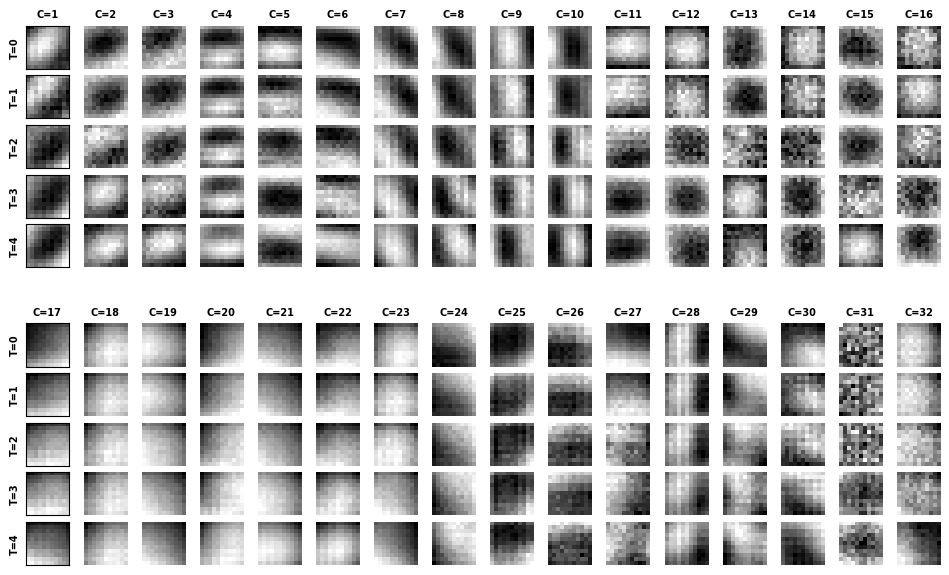

In [110]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Plot figure
out_channels = int(weights.shape[0]/2)   # 32
depth = weights.shape[2]          # 5
height = weights.shape[3]
width = weights.shape[4]

fig, axs = plt.subplots(nrows=2*depth+1, ncols=out_channels, figsize=(16 * 0.6, 11 * 0.6))

order_reorder = [9, 2, 10, 6, 5, 4, 8, 1, 3, 7] 

order = [4, 5, 8, 11, 13, 16, 17, 25, 27, 29, 10, 2, 6, 23, 24, 32, 1, 3,   18, 19,  26, 14, 30, 28, 9, 22, 21, 7, 15]
order = np.array(order)
order[:10] = order[np.array(order_reorder)-1]

order_add = set(list(range(32))).difference(list(np.array(order) - 1))
order = list(np.array(order)-1) + list(order_add)

for t in range(depth):  # t = 0 to 4
    for c in range(weights.shape[0]):  # 0 to 31
        kernel_slice = weights[order[c], :, t, :, :].numpy()  # shape: (in_channels, H, W)
        norm_image = kernel_slice - np.min(kernel_slice)
        norm_image /= np.max(norm_image)
        norm_image = norm_image.mean(0)  # average across input channels

        ax = axs[t + 6*int(np.floor(c/out_channels)), c % out_channels]
        ax.imshow(norm_image, cmap='gray')
        ax.axis('off')

        if t == 0:
            plt.sca(ax)
            plt.title(f"C={c+1}", fontsize=8, fontweight='bold', size=7)

        # Add label on the left side of the figure
        if c+1 == 1 or c+1 == 17:
            plt.sca(ax)
            ax.axis('on')

            plt.gca().axes.get_yaxis().set_visible(True)
            plt.gca().axes.get_xaxis().set_visible(False)

            plt.xticks([])
            plt.yticks([])
            plt.gca().set_ylabel(f'T={t}', fontweight='bold', fontsize=7)
            
for i in range(out_channels):
    ax = axs[5, i]
    ax.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-.92)
plt.tight_layout()
plt.savefig("figures/conv1_filters.pdf")
plt.show()

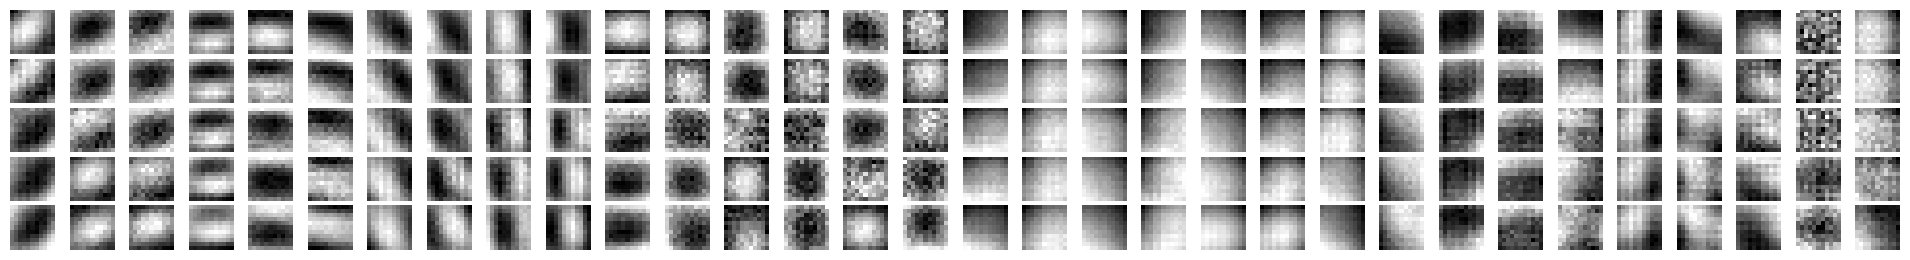

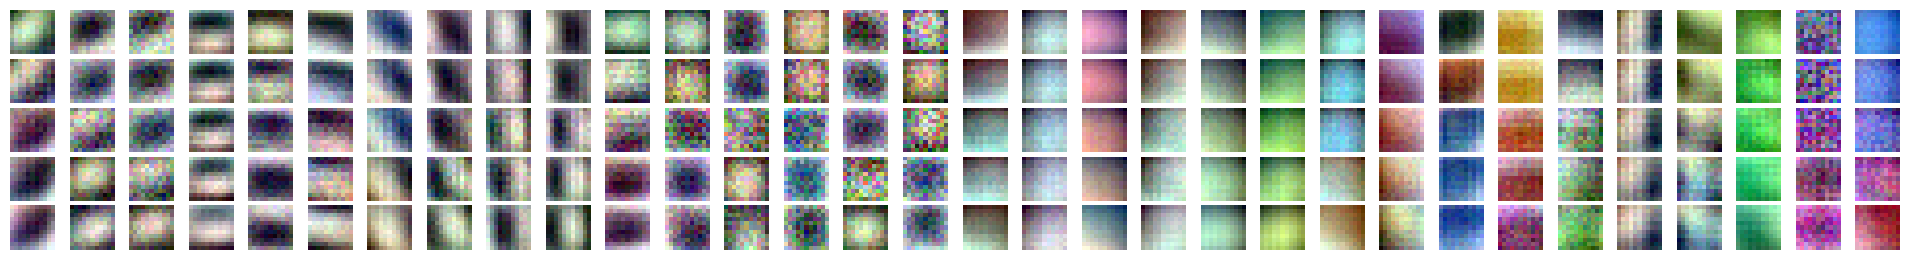

In [142]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Plot figure
out_channels = int(weights.shape[0])   # 32
depth = weights.shape[2]          # 5
height = weights.shape[3]
width = weights.shape[4]

fig, axs = plt.subplots(nrows=depth, ncols=out_channels, figsize=(32 * 0.6, 5 * 0.6))

order_reorder = [9, 2, 10, 6, 5, 4, 8, 1, 3, 7] 

order = [4, 5, 8, 11, 13, 16, 17, 25, 27, 29, 10, 2, 6, 23, 24, 32, 1, 3,   18, 19,  26, 14, 30, 28, 9, 22, 21, 7, 15]
order = np.array(order)
order[:10] = order[np.array(order_reorder)-1]

order_add = set(list(range(32))).difference(list(np.array(order) - 1))
order = list(np.array(order)-1) + list(order_add)

for t in range(depth):  # t = 0 to 4
    for c in range(weights.shape[0]):  # 0 to 31
        kernel_slice = weights[order[c], :, t, :, :].numpy()  # shape: (in_channels, H, W)
        norm_image = kernel_slice - np.min(kernel_slice)
        norm_image /= np.max(norm_image)
        norm_image = norm_image.mean(0)  # average across input channels

        ax = axs[t + 6*int(np.floor(c/out_channels)), c % out_channels]
        ax.imshow(norm_image, cmap='gray')
        ax.axis('off')

        if t == 0:
            plt.sca(ax)
            #plt.title(f"C={c+1}", fontsize=8, fontweight='bold', size=7)

        # Add label on the left side of the figure
        if c+1 == 1:
            plt.sca(ax)
            #ax.axis('on')

            #plt.gca().axes.get_yaxis().set_visible(True)
            #plt.gca().axes.get_xaxis().set_visible(False)

            #plt.xticks([])
            #plt.yticks([])
            #plt.gca().set_ylabel(f'T={t}', fontweight='bold', fontsize=7)
            
#for i in range(out_channels):
    #ax = axs[5, i]
    #ax.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-.62)
plt.tight_layout()
plt.savefig("figures/conv1_filters_onerow_gray.pdf")
plt.show()


# Plot figure
out_channels = int(weights.shape[0])   # 32
depth = weights.shape[2]          # 5
height = weights.shape[3]
width = weights.shape[4]

fig, axs = plt.subplots(nrows=depth, ncols=out_channels, figsize=(32 * 0.6, 5 * 0.6))

order_reorder = [9, 2, 10, 6, 5, 4, 8, 1, 3, 7] 

order = [4, 5, 8, 11, 13, 16, 17, 25, 27, 29, 10, 2, 6, 23, 24, 32, 1, 3,   18, 19,  26, 14, 30, 28, 9, 22, 21, 7, 15]
order = np.array(order)
order[:10] = order[np.array(order_reorder)-1]

order_add = set(list(range(32))).difference(list(np.array(order) - 1))
order = list(np.array(order)-1) + list(order_add)

for t in range(depth):  # t = 0 to 4
    for c in range(weights.shape[0]):  # 0 to 31
        kernel_slice = weights[order[c], :, t, :, :].numpy()  # shape: (in_channels, H, W)
        norm_image = kernel_slice - np.min(kernel_slice)
        norm_image /= np.max(norm_image)
        norm_image = np.transpose(norm_image,(1, 2, 0))
        #norm_image = norm_image.mean(0)  # average across input channels

        ax = axs[t + 6*int(np.floor(c/out_channels)), c % out_channels]
        ax.imshow(norm_image)
        ax.axis('off')

        if t == 0:
            plt.sca(ax)
            #plt.title(f"C={c+1}", fontsize=8, fontweight='bold', size=7)

        # Add label on the left side of the figure
        if c+1 == 1:
            plt.sca(ax)
            #ax.axis('on')

            #plt.gca().axes.get_yaxis().set_visible(True)
            #plt.gca().axes.get_xaxis().set_visible(False)

            #plt.xticks([])
            #plt.yticks([])
            #plt.gca().set_ylabel(f'T={t}', fontweight='bold', fontsize=7)
            
#for i in range(out_channels):
    #ax = axs[5, i]
    #ax.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-.62)
plt.tight_layout()
plt.savefig("figures/conv1_filters_onerow_color.pdf")
plt.show()

(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 11, 11)
(3, 

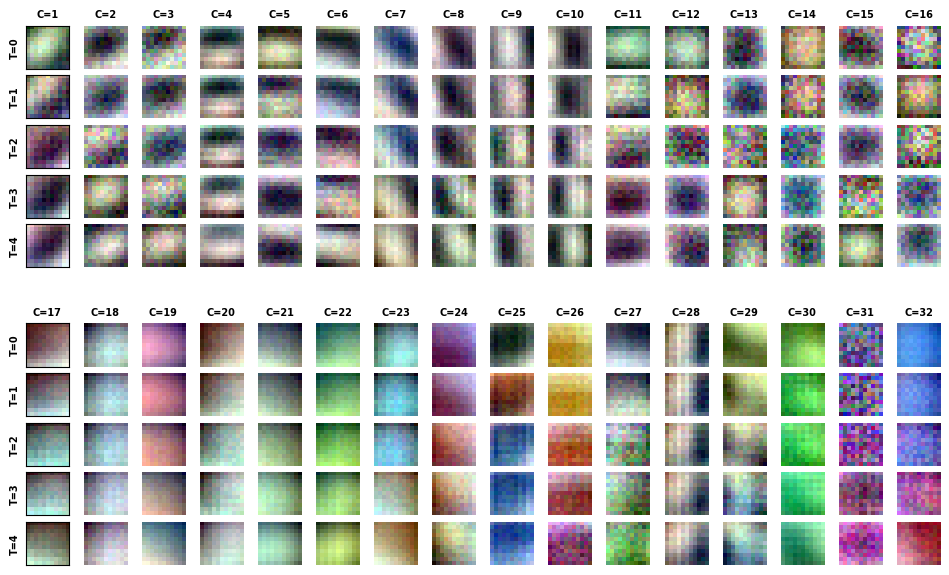

In [107]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# color version

# Plot figure
out_channels = int(weights.shape[0]/2)   # 32
depth = weights.shape[2]          # 5
height = weights.shape[3]
width = weights.shape[4]

fig, axs = plt.subplots(nrows=2*depth+1, ncols=out_channels, figsize=(16 * 0.6, 11 * 0.6))

order_reorder = [9, 2, 10, 6, 5, 4, 8, 1, 3, 7] 

order = [4, 5, 8, 11, 13, 16, 17, 25, 27, 29, 10, 2, 6, 23, 24, 32, 1, 3,   18, 19,  26, 14, 30, 28, 9, 22, 21, 7, 15]
order = np.array(order)
order[:10] = order[np.array(order_reorder)-1]

order_add = set(list(range(32))).difference(list(np.array(order) - 1))
order = list(np.array(order)-1) + list(order_add)

for t in range(depth):  # t = 0 to 4
    for c in range(weights.shape[0]):  # 0 to 31
        kernel_slice = weights[order[c], :, t, :, :].numpy()  # shape: (in_channels, H, W)
        norm_image = kernel_slice - np.min(kernel_slice)
        norm_image /= np.max(norm_image)
        norm_image = norm_image # average across input channels
        print(norm_image.shape)
        norm_image = np.transpose(norm_image, (1,2,0))

        ax = axs[t + 6*int(np.floor(c/out_channels)), c % out_channels]
        ax.imshow(norm_image) #, cmap='gray')
        ax.axis('off')

        if t == 0:
            plt.sca(ax)
            plt.title(f"C={c+1}", fontsize=8, fontweight='bold', size=7)

        # Add label on the left side of the figure
        if c+1 == 1 or c+1 == 17:
            plt.sca(ax)
            ax.axis('on')

            plt.gca().axes.get_yaxis().set_visible(True)
            plt.gca().axes.get_xaxis().set_visible(False)

            plt.xticks([])
            plt.yticks([])
            plt.gca().set_ylabel(f'T={t}', fontweight='bold', fontsize=7)
            
for i in range(out_channels):
    ax = axs[5, i]
    ax.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-.92)
plt.tight_layout()
plt.savefig("figures/conv1_filters.pdf")
plt.show()

In [102]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Plot Gif

# Set parameters
out_channels = int(weights.shape[0] / 2)   # 32
depth = weights.shape[2]                   # 5
height = weights.shape[3]
width = weights.shape[4]

# Reordering logic
order_reorder = [9, 2, 10, 6, 5, 4, 8, 1, 3, 7]
order = [4, 5, 8, 11, 13, 16, 17, 25, 27, 29, 10, 2, 6, 23, 24, 32, 1, 3, 18, 19, 26, 14, 30, 28, 9, 22, 21, 7, 15]
order = np.array(order)
order[:10] = order[np.array(order_reorder) - 1]
order_add = set(list(range(32))).difference(list(np.array(order) - 1))
order = list(np.array(order) - 1) + list(order_add)

os.makedirs("frames", exist_ok=True)

frame_paths = []

# Loop over time (depth) and create each frame
for t in range(depth):
    fig, axs = plt.subplots(1, 8, figsize=(12, 2))  # 4x8 grid
    axs = axs.flatten()

    for c in range(8):
        ax = axs[c]
        kernel_slice = weights[order[c], :, t, :, :].numpy()  # shape: (in_channels, H, W)

        # Normalize and collapse across input channels
        norm_image = kernel_slice - np.min(kernel_slice)
        norm_image /= np.max(norm_image) if np.max(norm_image) > 0 else 1
        norm_image = norm_image.mean(0)

        ax.imshow(norm_image, cmap='gray')
        ax.axis('off')

    for ax in axs[8:]:
        ax.axis('off')
    plt.suptitle(f'Dorsal Stream Encoding Model Filters', fontsize=16, fontweight='bold')
    frame_path = f"frames/frame_{t}.png"
    plt.tight_layout()
    plt.savefig(frame_path, dpi=100)
    frame_paths.append(frame_path)
    plt.close(fig)

images = [Image.open(p) for p in frame_paths]

pause_frame = images[-1].copy()
for _ in range(5):
    images.append(pause_frame)

gif_path = "../assets/dorsal_encoding_filters.gif"
images[0].save(
    gif_path,
    save_all=True,
    append_images=images[1:],
    duration=100,  
    loop=0 
)

for p in frame_paths:
    os.remove(p)
os.rmdir("frames")

print(f"GIF saved to {gif_path}")

GIF saved to ../assets/dorsal_encoding_filters.gif
